In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import learning_curve

In [ ]:
df=pd.read_csv('/content/odi.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


In [ ]:
df.shape

(350899, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


In [ ]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [ ]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000
mean,594.360426,114.801661,2.974970,24.052899,23.548303,0.669814,35.180129,12.427944,255.355387
std,343.605128,77.665959,2.298959,14.235439,11.042974,0.833895,28.115264,15.019181,62.354412
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
25%,296.000000,51.000000,1.000000,11.600000,17.000000,0.000000,13.000000,2.000000,217.000000
50%,596.000000,105.000000,3.000000,23.600000,23.000000,0.000000,29.000000,7.000000,257.000000
75%,893.000000,168.000000,4.000000,36.200000,29.000000,1.000000,50.000000,18.000000,298.000000
max,1188.000000,444.000000,10.000000,49.600000,101.000000,7.000000,264.000000,149.000000,444.000000


In [ ]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [ ]:

cols_to_remove = ['mid' , 'venue' , 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=cols_to_remove , axis=1 , inplace = True)

In [ ]:
df.shape

(350899, 9)

In [ ]:
df['bat_team'].unique()

array(['Sri Lanka', 'New Zealand', 'Australia', 'South Africa',
       'Pakistan', 'Bangladesh', 'West Indies', 'India', 'England',
       'Zimbabwe', 'Kenya', 'Bermuda', 'Netherlands', 'Canada',
       'Scotland', 'Ireland', 'Asia XI', 'Afghanistan', 'Hong Kong',
       'United Arab Emirates', 'Papua New Guinea'], dtype=object)

In [ ]:
len(df['bat_team'].unique())

21

In [ ]:
values_to_remove = ['Kenya', 'Bermuda', 'Canada', 'Asia XI', 'Hong Kong', 'Papua New Guinea']
df = df[~df['bat_team'].isin(values_to_remove)]

In [ ]:
len(df['bat_team'].unique())

15

In [ ]:
values_to_remove = ['Kenya', 'Bermuda', 'Canada', 'Asia XI', 'Hong Kong', 'Papua New Guinea']
df = df[~df['bowl_team'].isin(values_to_remove)]

In [ ]:
df['bowl_team'].unique()

array(['New Zealand', 'Sri Lanka', 'South Africa', 'Australia', 'India',
       'West Indies', 'Bangladesh', 'Pakistan', 'England', 'Zimbabwe',
       'Ireland', 'Scotland', 'Netherlands', 'United Arab Emirates',
       'Afghanistan'], dtype=object)

In [ ]:
len(df['bowl_team'].unique())

15

In [ ]:
df

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
6435,2006-01-03,Sri Lanka,New Zealand,169,4,37.1,23,2,255
6206,2006-01-03,Sri Lanka,New Zealand,1,0,0.2,1,0,255
6207,2006-01-03,Sri Lanka,New Zealand,1,0,0.3,1,0,255
6208,2006-01-03,Sri Lanka,New Zealand,1,0,0.4,1,0,255
6209,2006-01-03,Sri Lanka,New Zealand,1,0,0.5,1,0,255
...,...,...,...,...,...,...,...,...,...
350894,2017-07-10,Sri Lanka,Zimbabwe,201,8,49.2,39,0,203
350744,2017-07-10,Sri Lanka,Zimbabwe,92,4,24.6,18,1,203
350896,2017-07-10,Sri Lanka,Zimbabwe,201,8,49.4,38,0,203
350861,2017-07-10,Sri Lanka,Zimbabwe,160,8,43.6,17,1,203


In [ ]:

df = df[df['overs']>=5.0]
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
6435,2006-01-03,Sri Lanka,New Zealand,169,4,37.1,23,2,255
6280,2006-01-03,Sri Lanka,New Zealand,51,1,11.6,26,0,255
6241,2006-01-03,Sri Lanka,New Zealand,24,1,5.5,22,1,255
6237,2006-01-03,Sri Lanka,New Zealand,24,0,5.1,23,0,255
6238,2006-01-03,Sri Lanka,New Zealand,24,0,5.2,23,0,255


In [ ]:
df.shape

(298182, 9)

In [ ]:
df['date'] = df['date'].astype('datetime64[ns]')


<ipython-input-38-390d895421f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['date'].astype('datetime64[ns]')


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


<ipython-input-39-87dd68f14586>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


In [ ]:
df['date'].dtype

dtype('<M8[ns]')

In [ ]:
cat_df = pd.get_dummies(data = df, columns = ['bat_team' , 'bowl_team'])

In [ ]:
cat_df.head(2)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Afghanistan,bat_team_Australia,bat_team_Bangladesh,...,bowl_team_Ireland,bowl_team_Netherlands,bowl_team_New Zealand,bowl_team_Pakistan,bowl_team_Scotland,bowl_team_South Africa,bowl_team_Sri Lanka,bowl_team_United Arab Emirates,bowl_team_West Indies,bowl_team_Zimbabwe
6435,2006-01-03,169,4,37.1,23,2,255,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6280,2006-01-03,51,1,11.6,26,0,255,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Total Data 298182

93% Training(280044)

7% Testing(18138)

In [ ]:
# split the data into train and test set - based on date column
X_train = cat_df.drop(labels = 'total', axis = 1)[cat_df['date'].dt.year <= 2016]
X_test = cat_df.drop(labels = 'total', axis = 1) [cat_df['date'].dt.year >= 2017]

In [ ]:
len(X_train)

280044

In [ ]:
len(X_test)

18138

In [ ]:
# since only one column so cosidered as series
y_train = cat_df[cat_df['date'].dt.year <= 2016]['total'].values
y_test = cat_df[cat_df['date'].dt.year >= 2017]['total'].values

In [ ]:
# dropping date column
X_train.drop(labels = 'date', axis = True, inplace = True)
X_test.drop(labels = 'date', axis = True, inplace = True)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

In [ ]:
results = {}

for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the results in a dictionary
    results[model_name] = {
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "Root Mean Squared Error": rmse,
        "R-squared": r2
    }

In [ ]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

Model: Linear Regression
Mean Squared Error: 1680.1834
Mean Absolute Error: 31.8462
Root Mean Squared Error: 40.9900
R-squared: 0.5823


Model: Lasso Regression
Mean Squared Error: 1751.9609
Mean Absolute Error: 32.6131
Root Mean Squared Error: 41.8564
R-squared: 0.5644


Model: Ridge Regression
Mean Squared Error: 1680.1624
Mean Absolute Error: 31.8460
Root Mean Squared Error: 40.9898
R-squared: 0.5823


Model: Random Forest Regressor
Mean Squared Error: 2017.3865
Mean Absolute Error: 33.3707
Root Mean Squared Error: 44.9153
R-squared: 0.4984


Model: Decision Tree Regressor
Mean Squared Error: 2972.2689
Mean Absolute Error: 40.8072
Root Mean Squared Error: 54.5185
R-squared: 0.2610




/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


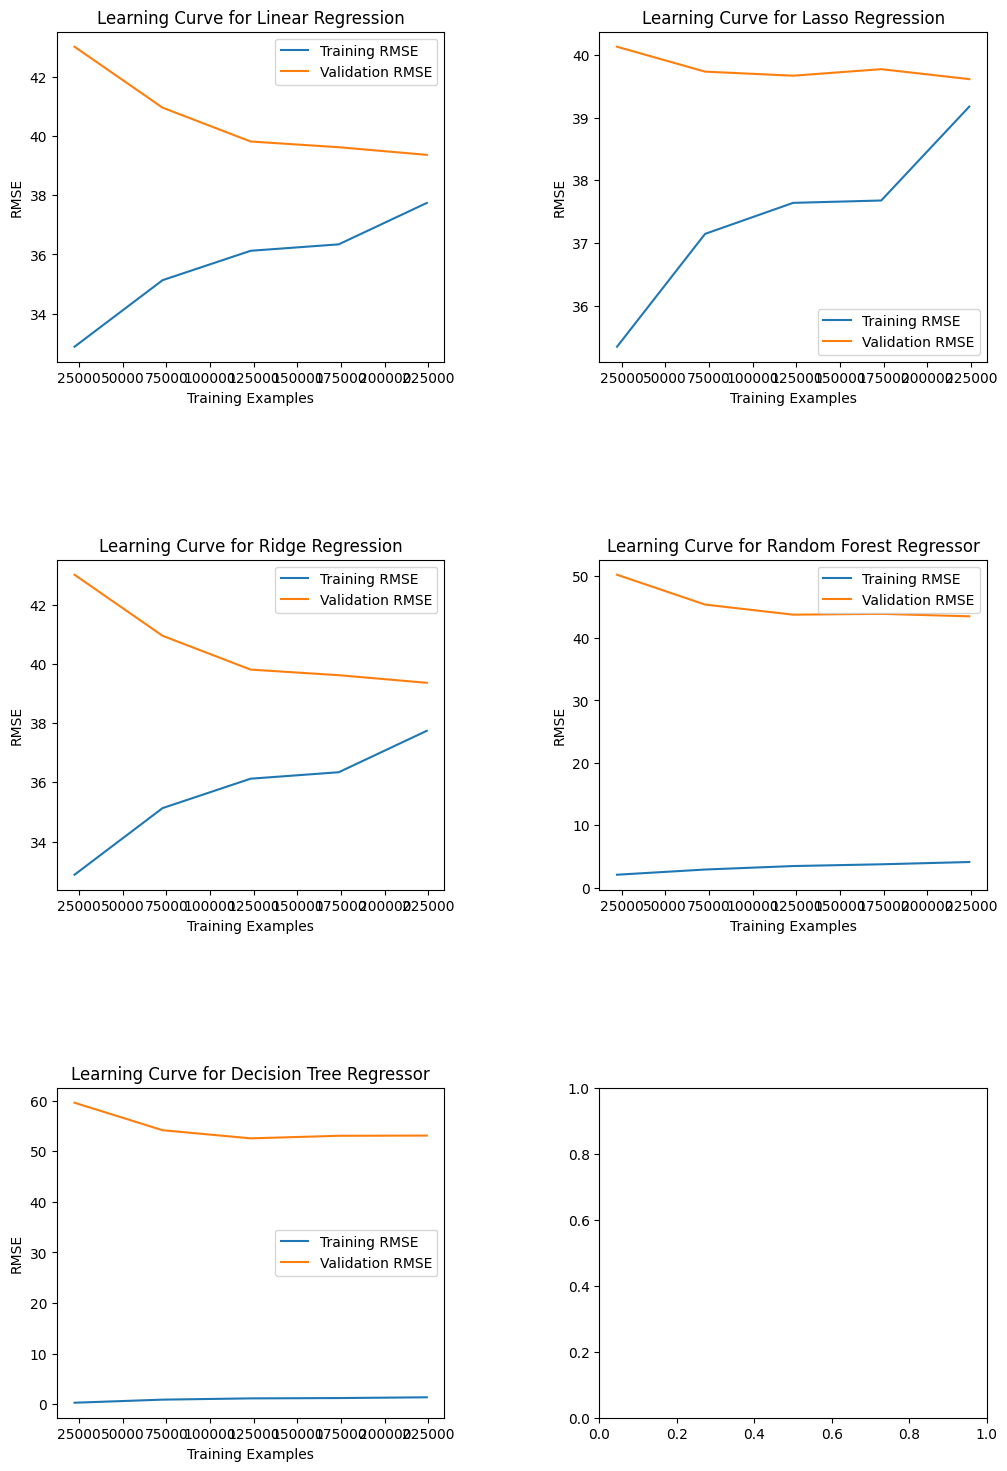

In [ ]:

fig, axes = plt.subplots(3, 2, figsize=(12, 18))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Loop through the models and plot the learning curve for each
for idx, (model_name, model) in enumerate(models.items()):
    ax = axes[idx // 2, idx % 2]

    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1,
                                                            scoring='neg_mean_squared_error')
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    test_rmse = np.sqrt(-test_scores.mean(axis=1))

    ax.plot(train_sizes, train_rmse, label='Training RMSE')
    ax.plot(train_sizes, test_rmse, label='Validation RMSE')
    ax.set_title(f'Learning Curve for {model_name}')
    ax.set_xlabel('Training Examples')
    ax.set_ylabel('RMSE')
    ax.legend()

plt.show()

<ipython-input-58-ce4dcad64f4e>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred, ax=ax)
<ipython-input-58-ce4dcad64f4e>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred, ax=ax)
<ipython-input-58-ce4dcad64f4e>:18: UserWarning: 

`distplot` is a deprecated functi

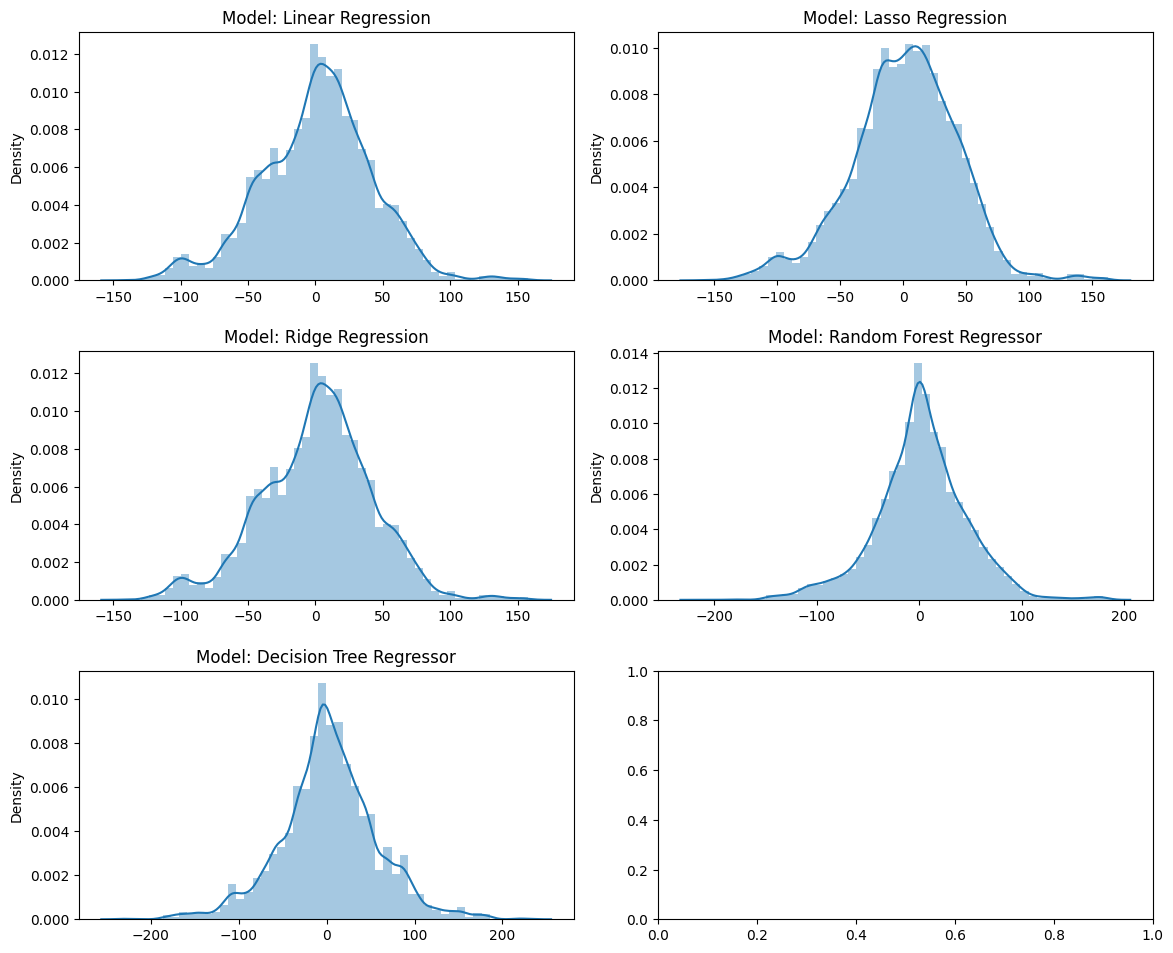

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.tight_layout(pad=3.0)

# Iterate through models and plot their fit
for (model_name, model), ax in zip(models.items(), axes.flatten()):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Plot the fit - Replace this comment with your specific plot code
    # For example, you can plot a distribution of residuals using seaborn
    sns.distplot(y_test - y_pred, ax=ax)
    ax.set_title(f'Model: {model_name}')

# Show the plots
plt.show()

**Conclusion**

The Linear Regression model is the best because it makes predictions that are very close to the actual values, as shown by its low MSE, MAE and RMSE. It also has a high R-squared value (0.5823), which means it fits the data well and explains a lot about the target variable. Overall, Linear Regression is the top-performing model among the others.